In [7]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
'''VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
'''

In [2]:
test = pd.read_csv('~/Documents/PYTHON/Udemy/Titanic/test.csv')

In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [13]:
train = pd.read_csv('~/Documents/PYTHON/Udemy/Titanic/train.csv')

In [9]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [19]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


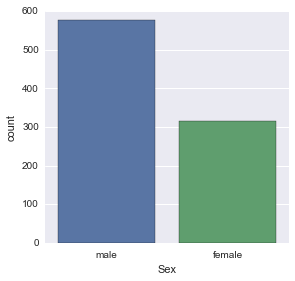

In [15]:
sns.factorplot('Sex', data=train, kind='count')

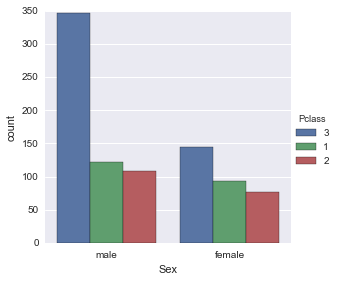

In [16]:
sns.factorplot('Sex', data=train, kind='count', hue='Pclass')

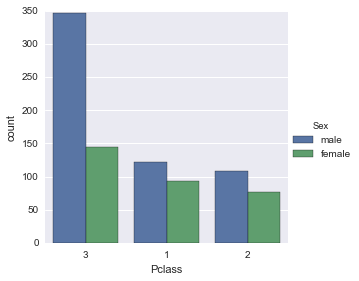

In [17]:
sns.factorplot('Pclass', data=train, kind='count', hue='Sex')

In [22]:
# create a column for M,F,C=child
def make_person(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
train['person'] = train[['Age','Sex']].apply(make_person,axis=1)

In [24]:
train['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

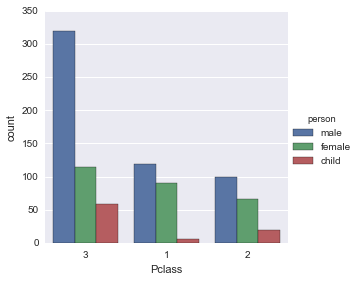

In [26]:
sns.factorplot('Pclass', data=train, kind='count', hue='person')

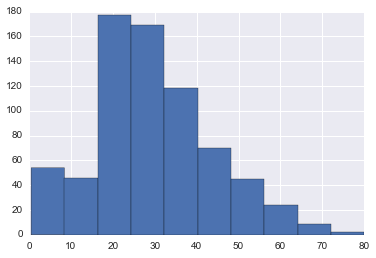

In [27]:
train['Age'].hist()

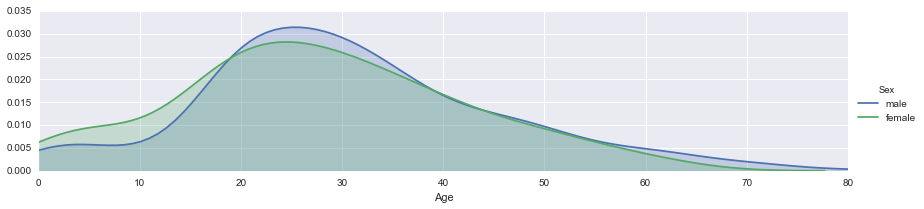

In [34]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = train['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

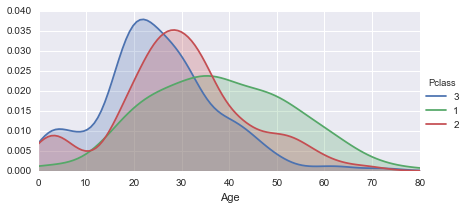

In [38]:
fig=sns.FacetGrid(train, hue='Pclass', aspect=2)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [39]:
# Creating a new column for deck: first letter is the deck
deck=train['Cabin'].dropna()

/Users/ruslana/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(....) is deprecated, use sort_index(.....)


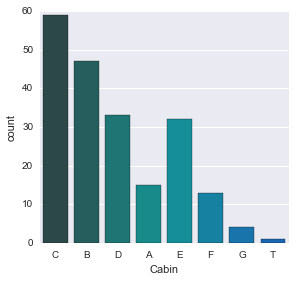

In [46]:
levels = []

for level in deck:
    levels.append(level[0])


# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df.sort(ascending=0),palette='winter_d',
               kind='count')

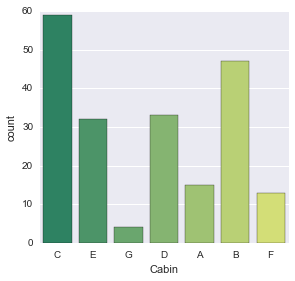

In [53]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='summer', 
               kind='count')

# more palettes: http://matplotlib.org/users/colormaps.html

In [54]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
tr = train['Embarked'].value_counts()
tr/tr.sum()

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

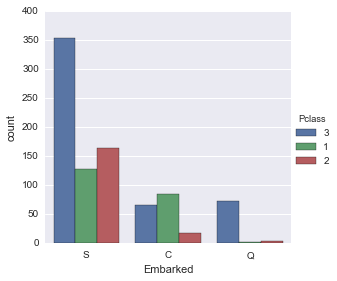

In [68]:
sns.factorplot('Embarked', data=train, hue='Pclass', kind='count')

In [78]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [79]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [80]:
train['Alone'] = train['SibSp'] + train['Parch']

In [81]:
train['Alone'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone, dtype: int64

In [84]:
train['is_alone'] = train['Alone'].apply(lambda x: 1 if x==0 else 0)
train['is_alone'].value_counts()

1    537
0    354
Name: is_alone, dtype: int64

In [85]:
## OR 
train['is_alone'] = train['Alone'] ==0
train['is_alone'].value_counts()

True     537
False    354
Name: is_alone, dtype: int64

In [88]:
# OR Look for >0 or ==0 to set alone status
#train['Alone'].loc[train['Alone'] >0] = 'With Family'
#train['Alone'].loc[train['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
#url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'


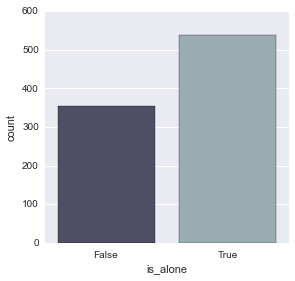

In [92]:
sns.factorplot('is_alone', data=train, palette = 'bone', kind='count' )

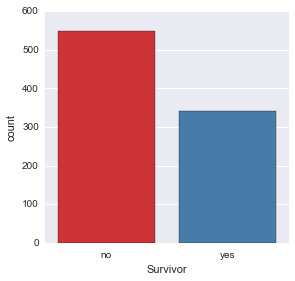

In [95]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
train["Survivor"] = train.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=train,palette='Set1', kind='count')

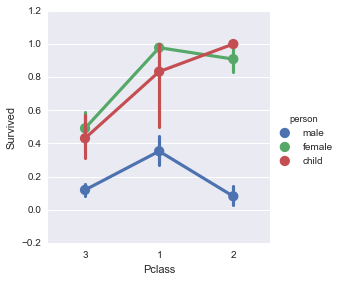

In [111]:
sns.factorplot('Pclass', 'Survived', data=train, hue='person')

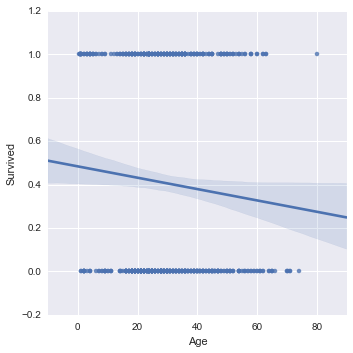

In [114]:
sns.lmplot('Age','Survived',data=train)

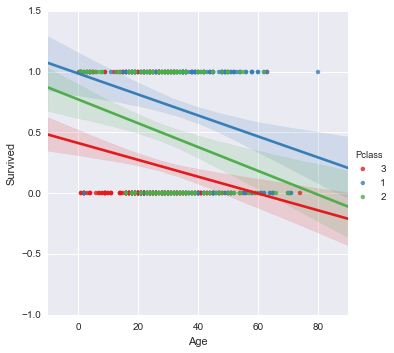

In [117]:
sns.lmplot('Age','Survived',hue='Pclass',data=train,palette='Set1')

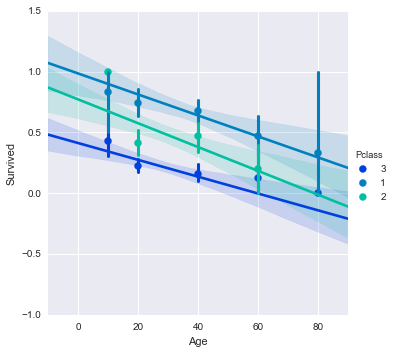

In [119]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=train,palette='winter',x_bins=generations)


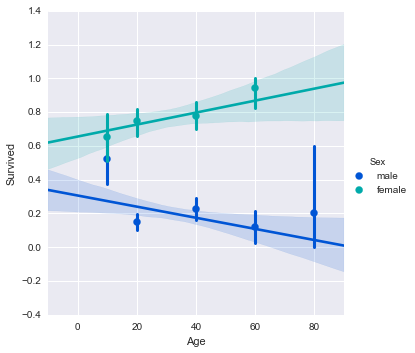

In [121]:
sns.lmplot('Age','Survived',hue='Sex',data=train,palette='winter',
           x_bins=generations)

In [ ]:
'''1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2.) Did having a family member increase the odds of surviving the crash?
'''

In [139]:
train['Cabin'].dtype

dtype('O')

In [144]:
train['Deck']=train['Cabin'].str[:1]

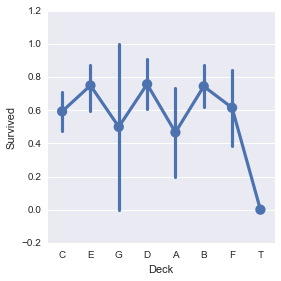

In [145]:
sns.factorplot('Deck', 'Survived', data=train)

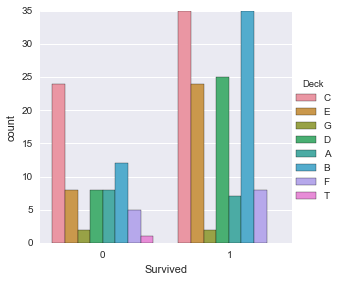

In [151]:
sns.factorplot( "Survived", hue='Deck', data=train, kind='count');

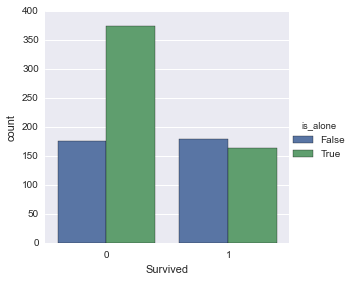

In [152]:
sns.factorplot( "Survived", hue='is_alone', data=train, kind='count');

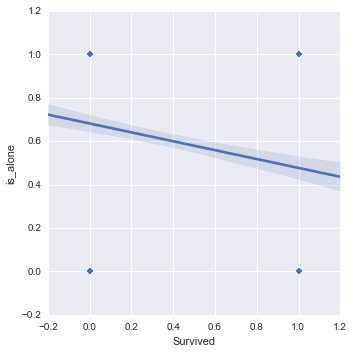

In [153]:
sns.lmplot("Survived", 'is_alone', data=train);